<a href="https://colab.research.google.com/github/Alex-Bernal27/Colab/blob/main/Tarea_6_Mapas_auto_organizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/JustGlowing/minisom/tree/master/examples

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8603 sha256=961f021b6afe0ec1f645e1700d4588db17eb6b4a4ff74329e657457fb5c0b460
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built minisom


# HAND WRITTEN DIGITS

In [ ]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import cv2

from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, BatchNormalization
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Descargar los datos desde Google Drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fruit_data.csv')

In [ ]:
train_Un = np.array([data.loc[i] for i in data.index if data.loc[i, 'Kind'] == 'Unsupervised'])

In [ ]:
mypath='/content/drive/MyDrive/Colab Notebooks/Data Parcial 3'
trainUn_images = np.empty(shape=(len(train_Un), 100, 100, 3),dtype=int)
for n in range(0, len(train_Un)):
  trainUn_images[n] = cv2.imread(join(mypath,train_Un[n][0]))

In [ ]:
trainUn_images = trainUn_images[:,:,:,0]

In [ ]:
x_train = trainUn_images.astype('float32') 
# Normalization
x_train = trainUn_images/255.0

In [ ]:
X_train = x_train.reshape(len(x_train),-1)

In [ ]:
X_train.shape

(766, 10000)

In [ ]:
som = MiniSom(30, 30, 10000, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
#pesos aleatorios
som.train(X_train, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 4.086988405555319


In [ ]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x in X_train:  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    im = im + 1

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(100, 100), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(trainUn_images[wmap[(i, j)]],
                      interpolation='nearest')
        else:
            plt.imshow(np.zeros((100, 100)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig(".jpg")
plt.show()

# COLOR SPACE MAPPING

In [ ]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

#Training inputs for RGBcolors
colors = [[0., 0., 0.],
      [0., 0., 1.],
      [0., 0., 0.5],
      [0.125, 0.529, 1.0],
      [0.33, 0.4, 0.67],
      [0.6, 0.5, 1.0],
      [0., 1., 0.],
      [1., 0., 0.],
      [0., 1., 1.],
      [1., 0., 1.],
      [1., 1., 0.],
      [1., 1., 1.],
      [.33, .33, .33],
      [.5, .5, .5],
      [.66, .66, .66]]
color_names = \
    ['black', 'blue', 'darkblue', 'skyblue',
     'greyblue', 'lilac', 'green', 'red',
     'cyan', 'violet', 'yellow', 'white',
     'darkgrey', 'mediumgrey', 'lightgrey']

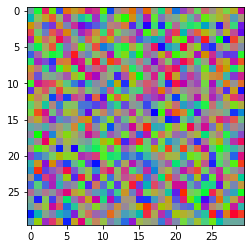

In [ ]:
som = MiniSom(30, 30, 3, sigma=3., 
              learning_rate=2.5, 
              neighborhood_function='gaussian')

plt.imshow(abs(som.get_weights()), interpolation='none')

 [ 409 / 500 ]  82% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 2.1712978027017824e-10


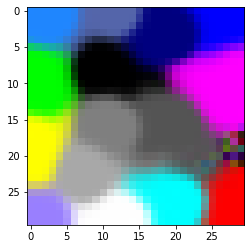

In [ ]:
som.train(colors, 500, random_order=True, verbose=True)

plt.imshow(abs(som.get_weights()), interpolation='none')

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.422193958298725e-05


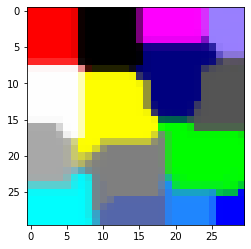

In [ ]:
som = MiniSom(30, 30, 3, sigma=8., 
              learning_rate=.5, 
              neighborhood_function='bubble')
som.train_random(colors, 500, verbose=True)

plt.imshow(abs(som.get_weights()), interpolation='none')

 # CLUSTERING

In [ ]:
from minisom import MiniSom
import numpy as np
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
                   sep='\t+', engine='python')
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.846705446733947


In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

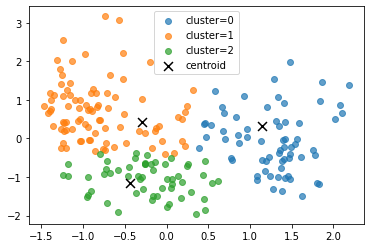

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

# TRAVELLING SALESMAN PROBLEM

In [ ]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.RandomState(10)
N_points = 40
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
y = np.sin(t)+(np.random.rand(N_points)-.5)*.3

som = MiniSom(1, N_neurons, 2, sigma=8, learning_rate=.4,
              neighborhood_function='gaussian', random_seed=0)
points = np.array([x,y]).T
som.random_weights_init(points)

/usr/local/lib/python3.7/dist-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


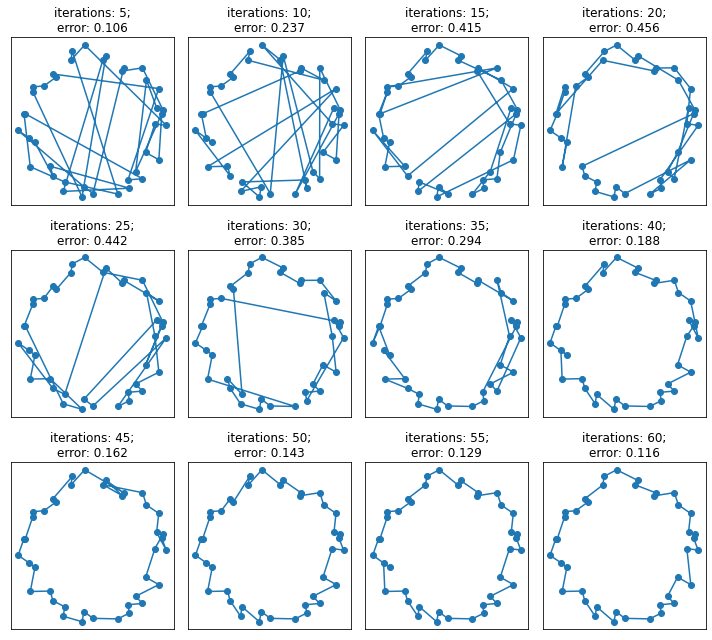

In [ ]:
plt.figure(figsize=(10, 9))
for i, iterations in enumerate(range(5, 61, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(3, 4, i+1)
    plt.scatter(x,y)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(points[visit_order][:,0], points[visit_order][:,1])
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, 
                                                        e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()